In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from tableone import TableOne
from helper.missing_analysis import missing_values_table

import seaborn as sns
import matplotlib.pyplot as plt

# This notebook describes data.

In [19]:
# import cleaned data
df = pd.read_csv('../data/cleaned_tender_data.csv')
df.head()

,id,year,title,cpv,contract_type,description,country,buyer_name,buyer_address,buyer_town,contracting_authority_type,contracting_authority_activity,government_procurement_agreement,is_framework_agreement,is_dynamic,is_open,value_eur
0,1-2021,2020,Cyber Threat Intelligence Infrastructure – Des...,['72000000'],Services,ENISA seeks to contract service providers for ...,Greece,European Union Agency for Cybersecurity,1 Vasilissis Sofias Street,Maroussi,European institution/agency or international o...,Other,No,Yes,No,Yes,3150000.0
1,1000-2015,2014,Ds-rempart.,['72910000'],Services,Maîtrise d'oeuvre du secours informatique de l...,France,Ministère de l'économie,Secrétariat général – SEP 1a – 18 avenue Léon ...,Paris Cedex 20,Ministry or any other national or federal auth...,General public services,Yes,No,No,Yes,2205140.0
2,100000-2015,2015,"Service de téléphonie filaire, de télécommunic...","['64210000', '64212000', '64221000', '72400000']",Services,"Services de téléphonie filaire, de télécommuni...",France,Communauté d'agglomération du Bassin d'Arcacho...,"2 allée d'Espagne, BP 147",Arcachon Cedex,Regional or local authority,Environment,Yes,Yes,No,Yes,NaN
3,100004-2015,2015,NaN,"['48810000', '48000000']",Services,Les prestations objet de la consultation conce...,France,Cerema,Bât. 4 — 25 avenue François Mitterrand — CS 92...,Bron Cedex,Body governed by public law,Environment,Yes,No,No,Yes,450000.0
4,100004-2018,2018,Framework agreement for Microsoft licences.,['48000000'],Supplies,"Sund, Øygarden og Fjell kommune hereby invites...",Norway,Sund kommune,Sund Senter,Skogsvåg,Regional or local authority,General public services,Yes,Yes,No,Yes,1227646.6


In [20]:
# print the number of countries with count less than 1000 tenders
print(f"There are {len(df['country'].value_counts()[df['country'].value_counts() < 1000])} countries with less than 1000 tenders")

# print number of rows that have countries that have less than 1000 tenders

print(f"This amounts to {len(df[~df['country'].isin(df['country'].value_counts()[df['country'].value_counts() > 1000].index)])} rows \n")

# group by country and show count.
print(df["country"].value_counts())

# remove countries that have less than 1000 tenders
print("\nRemoving countries with less than 1000 tenders...")
df = df[df["country"].isin(df["country"].value_counts()[df["country"].value_counts() > 1000].index)]

There are 59 countries with less than 1000 tenders
This amounts to 3512 rows 

country
France           40726
Germany          36734
Poland           34028
Spain            28271
Czechia          15317
                 ...  
French Guiana        1
Andorra              1
Barbados             1
Saudi Arabia         1
Congo                1
Name: count, Length: 87, dtype: int64

Removing countries with less than 1000 tenders...


In [21]:
print(f"There are only {len(df[df['year'] == 2013])} tenders in year 2013 in the dataset")
# year count
df["year"].value_counts()

# remove year 2013

print("\nRemoving year 2013...")

df = df[df["year"] != 2013]

There are only 152 tenders in year 2013 in the dataset

Removing year 2013...


In [22]:
# Print how many "Works" in contract_type and percentage of total contract type

print(f"There are only {len(df[df['contract_type'] == 'Works'])} tenders with contract type 'Works', which is {len(df[df['contract_type'] == 'Works'])/len(df['contract_type'])*100:.2f}% of total contract type ")

print("\nRemoving rows with type 'Works'...")
df = df[df["contract_type"] != "Works"]



There are only 3221 tenders with contract type 'Works', which is 1.08% of total contract type 

Removing rows with type 'Works'...


In [23]:
# identifying outliers in df["value_eur"] column

print(f"Descriptive statistics for value_eur column: \n\n {df['value_eur'].describe()}")

z = np.abs(stats.zscore(df["value_eur"], nan_policy='omit'))

print("\nNumber of outliers in tender value column, based on z value > 3: ", len(z[z > 3]))

# if value of z > 3, replace with NaN

df["value_eur"] = df["value_eur"].mask(z > 3, np.nan)

print("\nRemoving outliers from value_eur column...")

Descriptive statistics for value_eur column: 

 count    1.579000e+05
mean     3.834785e+09
std      1.350081e+12
min      0.000000e+00
25%      2.344945e+05
50%      5.000000e+05
75%      1.483077e+06
max      5.358064e+14
Name: value_eur, dtype: float64

Number of outliers in tender value column, based on z value > 3:  6

Removing outliers from value_eur column...


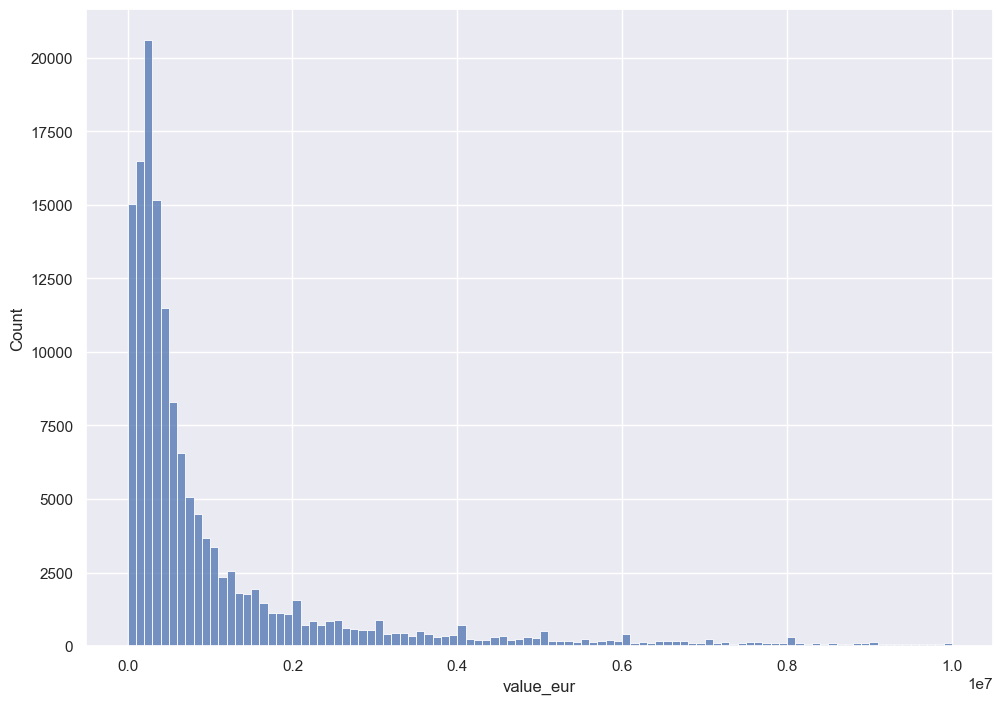

In [24]:
# limit the dataset to tenders with value_eur < 10000000
plot = df[df["value_eur"] < 10000000]

# plot the distribution of the value_eur column

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(plot["value_eur"], kde=False, bins=100)	
plt.show()

In [25]:
# TENDERS THAT ARE SAAS/CLOUD RELATED

# first make column title and description lowercase.

df["title"] = df["title"].str.lower()
df["description"] = df["description"].str.lower()

# then create a column called "saas" that shows "Yes" if there are any of the following in the "title" OR "description" columns: saas, software as a service, cloud.

df["saas"] = np.where(df["title"].str.contains("saas|software as a service|cloud") | df["description"].str.contains("saas|software as a service|cloud"), "Yes", "No")

In [26]:
# find values of contracting_authority_type that are smaller than 1.5% of the column and print its name.
# Then recode the values to "Other"
print("Recoding value to 'Other', if they are less than 1.5% of data:")

for i in df["contracting_authority_type"].value_counts().index:
    if df["contracting_authority_type"].value_counts()[i] / len(df.dropna(subset=['contracting_authority_type'])) < 0.015:
        print(f"Column {i} has {df['contracting_authority_type'].value_counts()[i]} values, which is {df['contracting_authority_type'].value_counts()[i] / len(df.dropna(subset=['contracting_authority_type'])) * 100:.2f}% of the column")
        df["contracting_authority_type"] = df["contracting_authority_type"].replace(i, "Other")


Recoding value to 'Other', if they are less than 1.5% of data:
Column European institution/agency or international organisation has 3146 values, which is 1.29% of the column


In [27]:
# find values of contracting_authority_activity that are smaller than 1.5% of the column and print its name.
# Then recode the values to "Other"
print("Recoding value to 'Other', if they are less than 1.5% of data:")

for i in df["contracting_authority_activity"].value_counts().index:
    if df["contracting_authority_activity"].value_counts()[i] / len(df.dropna(subset=['contracting_authority_activity'])) < 0.015:
        print(f"Column {i} has {df['contracting_authority_activity'].value_counts()[i]} values, which is {df['contracting_authority_activity'].value_counts()[i] / len(df.dropna(subset=['contracting_authority_activity'])) * 100:.2f}% of the column")
        df["contracting_authority_activity"] = df["contracting_authority_activity"].replace(i, "Other")

Recoding value to 'Other', if they are less than 1.5% of data:
Column Recreation, culture and religion has 3578 values, which is 1.36% of the column
Column Railway services has 3550 values, which is 1.35% of the column
Column Urban railway, tramway, trolleybus or bus services has 3206 values, which is 1.22% of the column
Column Production, transport and distribution of gas and heat has 1845 values, which is 0.70% of the column
Column Water has 1784 values, which is 0.68% of the column
Column Airport-related activities has 1612 values, which is 0.61% of the column
Column Postal services has 1221 values, which is 0.46% of the column
Column Port-related activities has 471 values, which is 0.18% of the column
Column Extraction of gas and oil has 174 values, which is 0.07% of the column
Column Exploration and extraction of coal and other solid fuels has 86 values, which is 0.03% of the column
Column Exploration and extraction of gas and oil has 43 values, which is 0.02% of the column


In [28]:
# Saving recoded data

print("Saving recoded data to csv file...\n")

df.to_csv("../data/cleaned_recoded_tender_data.csv")

Saving recoded data to csv file...



# Table 1. Descriptive information on all (non-recoded variables)

In [29]:
# import recoded data

df = pd.read_csv("../data/cleaned_recoded_tender_data.csv")

In [30]:

# create a tableone object

# categorical variables

columns = ["year", "contract_type", "contracting_authority_type", "contracting_authority_activity",
               "government_procurement_agreement", "is_framework_agreement", "is_dynamic", "is_open", "value_eur", "saas"]
categorical = ["year", "contract_type", "contracting_authority_type", "contracting_authority_activity",
               "government_procurement_agreement", "is_framework_agreement", "is_dynamic", "is_open", "saas"]
groupby = "saas"
non_normal = ["value_eur"]

# create a tableone object

tableone = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, nonnormal=non_normal, pval=True)

print("\nSaving tableone to csv file...")

tableone.to_csv("../outputs/tableone.csv")


Saving tableone to csv file...


## SaaS per country and year

In [31]:
# group by country, year, and saas and count rows and save as n_saas. 
# Then group by country and year and count rows and save as n_total. 
# Then divide n_saas by n_total and save as saas_share.

df_saas = df.loc[df["saas"] == "Yes"]

n_saas = df_saas.groupby(['country', 'year']).size().unstack(fill_value=0)
n_total = df.groupby(['country', 'year']).size().unstack(fill_value=0)
saas_share = n_saas.div(n_total)

# multiply saas share wtih 100 and round to 2 decimals and save as saas_pct_rounded.

saas_pct_rounded = saas_share.mul(100).round(2)
saas_pct_rounded = saas_pct_rounded.fillna(0).reset_index()

saas_pct_rounded

year,country,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Austria,1.02,0.00,0.78,1.49,0.00,0.71,0.88,3.26,3.39
1,Belgium,3.01,3.02,4.86,6.02,4.09,6.18,7.30,6.15,6.82
2,Bulgaria,0.00,0.00,0.00,0.00,0.00,0.14,1.78,1.30,3.81
3,Croatia,0.40,0.00,0.64,0.00,0.56,0.55,0.37,0.53,0.30
4,Czechia,0.48,0.84,0.70,0.00,1.15,1.87,1.18,2.09,2.58
5,Denmark,6.93,10.11,9.85,9.36,6.78,6.66,4.42,8.09,9.31
6,Estonia,0.00,0.98,0.00,0.76,0.00,1.74,1.24,0.37,1.95
7,Finland,5.02,5.09,4.20,5.97,12.34,10.65,13.39,16.01,14.66
8,France,1.05,1.52,2.01,2.96,3.09,4.12,4.71,4.63,5.03
9,Germany,0.74,0.99,2.26,2.23,2.55,3.12,3.86,4.50,4.53


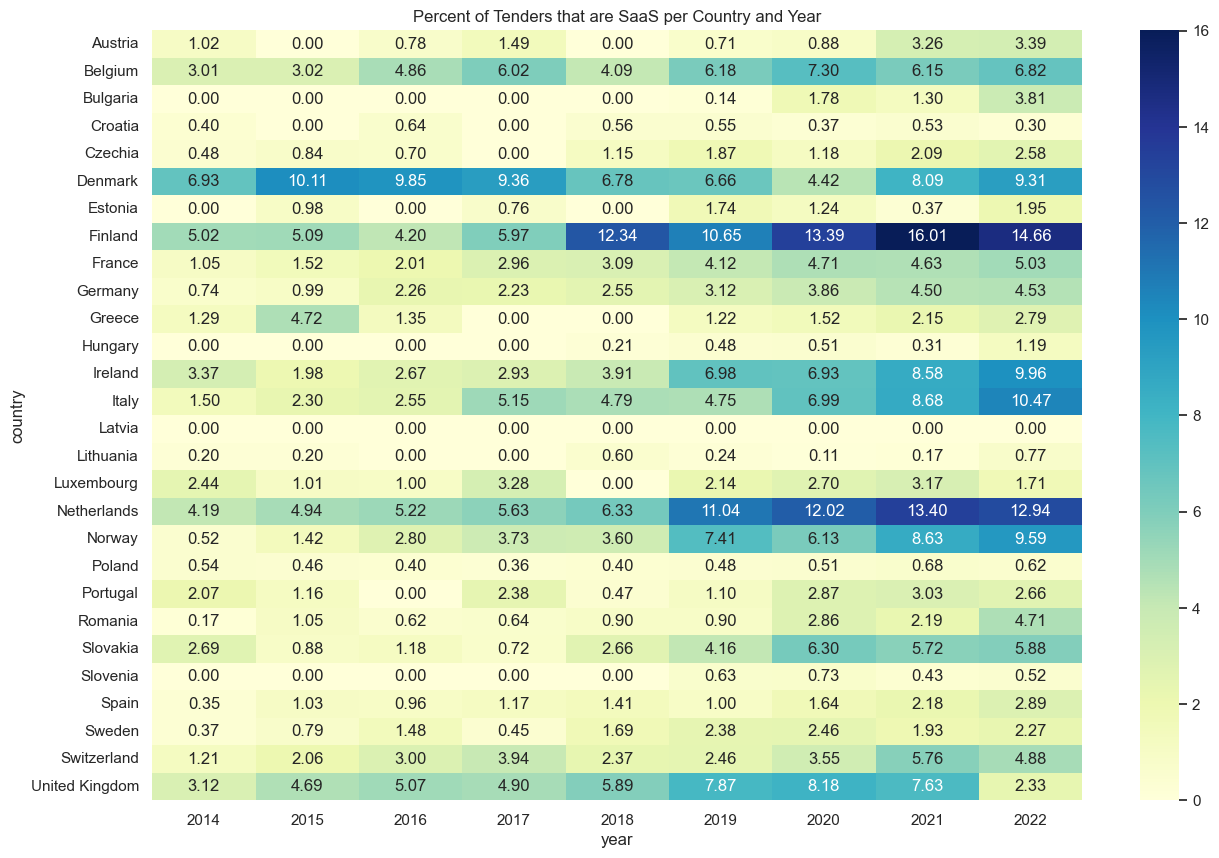

In [33]:
# plot saas_pct_rounded as a heatmap.

plt.figure(figsize=(15, 10))
sns.heatmap(saas_pct_rounded.set_index("country"), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Percent of Tenders that are SaaS per Country and Year")

plt.savefig("../outputs/saas_pct_rounded.png")

plt.show()

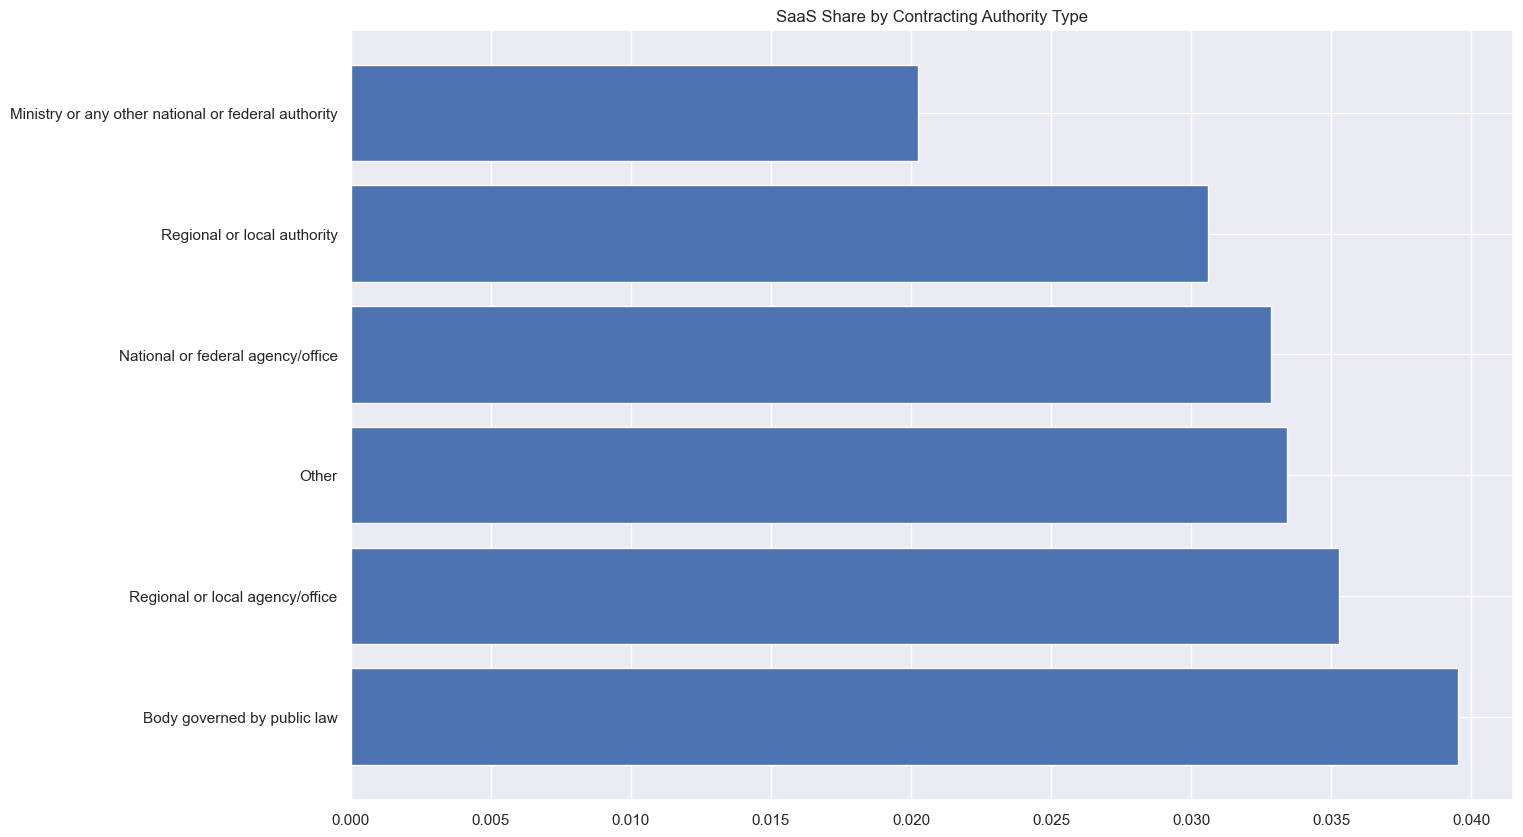

In [34]:
# show chart of saas share contracting authority type for all years.

df_authority = df.groupby(["contracting_authority_type", "saas"]).size().unstack(fill_value=0)

df_authority["total"] = df_authority["No"] + df_authority["Yes"]
df_authority["saas_share"] = df_authority["Yes"] / df_authority["total"]
df_authority = df_authority.sort_values(by="saas_share", ascending=False)

plt.figure(figsize=(15, 10))
plt.barh(df_authority.index, df_authority["saas_share"])
plt.title("SaaS Share by Contracting Authority Type")
plt.show()